In [1]:
# The imports we need for this project are as follows:
# import libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import warnings
warnings.filterwarnings("ignore")

In [2]:
cid = "d2d6702bd915459ba2725a590e66628e"
secret = "e0ba9c53f2b74b3683d85b6b165d7e2d"
#Authentication - without user
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [3]:
df = pd.read_csv('top_200_weekly.csv')
df.head()

,Position,Track Name,Artist,Streams,URL,Week Start,Week End,ID,URI
0,1,Starboy,The Weeknd,25734078,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2016-12-30,2017-01-06,5aAx2yezTd8zXrkmtKl66Z,spotify:track:5aAx2yezTd8zXrkmtKl66Z
1,2,Closer,The Chainsmokers,23519705,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2016-12-30,2017-01-06,7BKLCZ1jbUBVqRi2FVlTVw,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw
2,3,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,21216399,https://open.spotify.com/track/5knuzwU65gJK7IF...,2016-12-30,2017-01-06,5knuzwU65gJK7IF5yJsuaW,spotify:track:5knuzwU65gJK7IF5yJsuaW
3,4,Let Me Love You,DJ Snake,19852704,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,2016-12-30,2017-01-06,4pdPtRcBmOSQDlJ3Fk945m,spotify:track:4pdPtRcBmOSQDlJ3Fk945m
4,5,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,18316326,https://open.spotify.com/track/3NdDpSvN911VPGi...,2016-12-30,2017-01-06,3NdDpSvN911VPGivFlV5d0,spotify:track:3NdDpSvN911VPGivFlV5d0


In [4]:
df.nunique()

Position        200
Track Name     4077
Artist          956
Streams       52062
URL            4918
Week Start      261
Week End        261
ID             4918
URI            4918
dtype: int64

### Missing value

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52200 entries, 0 to 52199
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Position    52200 non-null  int64 
 1   Track Name  52193 non-null  object
 2   Artist      52193 non-null  object
 3   Streams     52200 non-null  int64 
 4   URL         52200 non-null  object
 5   Week Start  52200 non-null  object
 6   Week End    52200 non-null  object
 7   ID          52200 non-null  object
 8   URI         52200 non-null  object
dtypes: int64(2), object(7)
memory usage: 3.6+ MB


In [6]:
df.loc[df['Artist'].isna()].style.highlight_null(null_color='darkgreen')

,Position,Track Name,Artist,Streams,URL,Week Start,Week End,ID,URI
5603,4,nan,nan,25442248,https://open.spotify.com/track/3RXkboS74UYzN14xTqzPyY,2017-07-14,2017-07-21,3RXkboS74UYzN14xTqzPyY,spotify:track:3RXkboS74UYzN14xTqzPyY
5609,10,nan,nan,20049646,https://open.spotify.com/track/4JAyIDXOqNM6qHuZML01uX,2017-07-14,2017-07-21,4JAyIDXOqNM6qHuZML01uX,spotify:track:4JAyIDXOqNM6qHuZML01uX
5629,30,nan,nan,12964826,https://open.spotify.com/track/3eFJqPe8VUYrABbFjSauuj,2017-07-14,2017-07-21,3eFJqPe8VUYrABbFjSauuj,spotify:track:3eFJqPe8VUYrABbFjSauuj
5639,40,nan,nan,10766506,https://open.spotify.com/track/3bVbQvGVIe4n24AzyXovXh,2017-07-14,2017-07-21,3bVbQvGVIe4n24AzyXovXh,spotify:track:3bVbQvGVIe4n24AzyXovXh
8831,32,nan,nan,10597738,https://open.spotify.com/track/1YqcGlCHNquxBhlUZsjhMT,2017-11-03,2017-11-10,1YqcGlCHNquxBhlUZsjhMT,spotify:track:1YqcGlCHNquxBhlUZsjhMT
47863,64,nan,nan,9217441,https://open.spotify.com/track/2eKY4TBKeXnUXMtSLj4R0n,2021-07-30,2021-08-06,2eKY4TBKeXnUXMtSLj4R0n,spotify:track:2eKY4TBKeXnUXMtSLj4R0n
48036,37,nan,nan,11634865,https://open.spotify.com/track/2eKY4TBKeXnUXMtSLj4R0n,2021-08-06,2021-08-13,2eKY4TBKeXnUXMtSLj4R0n,spotify:track:2eKY4TBKeXnUXMtSLj4R0n


In [7]:
# Toy exxample get 
# track = 'spotify:track:4iJyoBOLtHqaGxP12qzhQI'
# track = sp.track(track)
# # print(track.keys())
# print(track['name'])
# print([a['name'] for a in track['artists']])

tracks = list(df.loc[df['Artist'].isna()]['URI'])
for track in tracks:
    print('*'*20)
    print(track)
    track = sp.track(track)

    print(track['name'],[a['name'] for a in track['artists']])    

********************
spotify:track:3RXkboS74UYzN14xTqzPyY
 ['']
********************
spotify:track:4JAyIDXOqNM6qHuZML01uX
 ['']
********************
spotify:track:3eFJqPe8VUYrABbFjSauuj
 ['']
********************
spotify:track:3bVbQvGVIe4n24AzyXovXh
 ['']
********************
spotify:track:1YqcGlCHNquxBhlUZsjhMT
 ['']
********************
spotify:track:2eKY4TBKeXnUXMtSLj4R0n
 ['']
********************
spotify:track:2eKY4TBKeXnUXMtSLj4R0n
 ['']


In [8]:
df.nunique()

Position        200
Track Name     4077
Artist          956
Streams       52062
URL            4918
Week Start      261
Week End        261
ID             4918
URI            4918
dtype: int64

### New datasets

In [9]:
df_rank = df[['Week End','ID','Position']]
# df_rank = df_rank.sort_values(by=['Week End','Position'])
df_rank.head()

,Week End,ID,Position
0,2017-01-06,5aAx2yezTd8zXrkmtKl66Z,1
1,2017-01-06,7BKLCZ1jbUBVqRi2FVlTVw,2
2,2017-01-06,5knuzwU65gJK7IF5yJsuaW,3
3,2017-01-06,4pdPtRcBmOSQDlJ3Fk945m,4
4,2017-01-06,3NdDpSvN911VPGivFlV5d0,5


In [10]:
df_rank_pivot = df_rank.pivot(index=['Week End'],columns=['Position'],values=['ID'])
df_rank_pivot.to_csv('week_position.csv',index_label=False)

In [11]:
df_rank_pivot.head()

ID                          \
Position                       1                       2     
Week End                                                     
2017-01-06  5aAx2yezTd8zXrkmtKl66Z  7BKLCZ1jbUBVqRi2FVlTVw   
2017-01-13  7qiZfU4dY1lWllzX7mPBI3  6PCUP3dWmTjcTtXY02oFdT   
2017-01-20  7qiZfU4dY1lWllzX7mPBI3  6PCUP3dWmTjcTtXY02oFdT   
2017-01-27  7qiZfU4dY1lWllzX7mPBI3  72jbDTw1piOOj770jWNeaG   
2017-02-03  7qiZfU4dY1lWllzX7mPBI3  72jbDTw1piOOj770jWNeaG   

                                                            \
Position                       3                       4     
Week End                                                     
2017-01-06  5knuzwU65gJK7IF5yJsuaW  4pdPtRcBmOSQDlJ3Fk945m   
2017-01-13  5aAx2yezTd8zXrkmtKl66Z  5knuzwU65gJK7IF5yJsuaW   
2017-01-20  72jbDTw1piOOj770jWNeaG  5aAx2yezTd8zXrkmtKl66Z   
2017-01-27  6PCUP3dWmTjcTtXY02oFdT  3NdDpSvN911VPGivFlV5d0   
2017-02-03  3NdDpSvN911VPGivFlV5d0  6PCUP3dWmTjcTtXY02oFdT   

                                                            \
Position                       5                       6     
Week End                                                     
2017-01-06  3NdDpSvN911VPGivFlV5d0  5MFzQMkrl1FOOng9tq6R9r   
2017-01-13  3NdDpSvN911VPGivFlV5d0  7BKLCZ1jbUBVqRi2FVlTVw   
2017-01-20  3NdDpSvN911VPGivFlV5d0  5knuzwU65gJK7IF5yJsuaW   
2017-01-27  5aAx2yezTd8zXrkmtKl66Z  5knuzwU65gJK7IF5yJsuaW   
2017-02-03  4aWmUDTfIPGksMNLV2rQP2  5knuzwU65gJK7IF5yJsuaW   

                                                            \
Position                       7                       8     
Week End                                                     
2017-01-06  343YBumqHu19cGoGARUTsd  5uCax9HTNlzGybIStD3vDh   
2017-01-13  5uCax9HTNlzGybIStD3vDh  5MFzQMkrl1FOOng9tq6R9r   
2017-01-20  7BKLCZ1jbUBVqRi2FVlTVw  5uCax9HTNlzGybIStD3vDh   
2017-01-27  7BKLCZ1jbUBVqRi2FVlTVw  5uCax9HTNlzGybIStD3vDh   
2017-02-03  5aAx2yezTd8zXrkmtKl66Z  5uCax9HTNlzGybIStD3vDh   

                                                            ...  \
Position                       9                       10   ...   
Week End                                                    ...   
2017-01-06  6b8Be6ljOzmkOmFslEb23P  5GXAXm5YOmYT0kL5jHvYBt  ...   
2017-01-13  5GXAXm5YOmYT0kL5jHvYBt  343YBumqHu19cGoGARUTsd  ...   
2017-01-20  5GXAXm5YOmYT0kL5jHvYBt  5MFzQMkrl1FOOng9tq6R9r  ...   
2017-01-27  5GXAXm5YOmYT0kL5jHvYBt  5MFzQMkrl1FOOng9tq6R9r  ...   
2017-02-03  4Km5HrUvYTaSUfiSGPJeQR  7BKLCZ1jbUBVqRi2FVlTVw  ...   

                                                            \
Position                       191                     192   
Week End                                                     
2017-01-06  5Fim1gaXBgsiFfsQAfQSDS  6gBFPUFcJLzWGx4lenP6h2   
2017-01-13  2q6tgiA9tpb6DMguABwCWE  00lNx0OcTJrS3MKHcB80HY   
2017-01-20  12REd1n8PeiHHWOh066tpr  36YCdzT57us0LhDmCYtrNE   
2017-01-27  6eT7xZZlB2mwyzJ2sUKG6w  0lmdsH1MIoLsMymnNpd6HU   
2017-02-03  05Z7jet4VDNVgNQWcYHnrk  2FBUoWkIuQXwayw2RNo5l6   

                                                            \
Position                       193                     194   
Week End                                                     
2017-01-06  7oK9VyNzrYvRFo7nQEYkWN  2FiSTH0GYpIioUgjfzMIja   
2017-01-13  6RsWqX8zABZLhZydXxEFOm  4sQMalN597HdggTu196aL0   
2017-01-20  2q6tgiA9tpb6DMguABwCWE  1lxswgIpzV6HhENRvkflES   
2017-01-27  0utlOiJy2weVl9WTkcEWHy  3B7udSGy2PfgoCniMSb523   
2017-02-03  5wihevBA7MO9PNYyWyTfkh  27GmP9AWRs744SzKcpJsTZ   

                                                            \
Position                       195                     196   
Week End                                                     
2017-01-06  6eT7xZZlB2mwyzJ2sUKG6w  19a3JfW8BQwqHWUMbcqSx8   
2017-01-13  4PdJSsESm34djLfBde9Pr2  3RiPr603aXAoi4GHyXx0uy   
2017-01-20  3BY2mafsbsoKGqS380Xnuz  34i4yxPrHWquuR4kjiivFO   
2017-01-27  12REd1n8PeiHHWOh066tpr  3a1lNhkSLSkpJE4MSHpDu9   
2017-02-03  0ADG9OgdVTL7fgREP75BrZ  50PWlIBU7PlGGwzgN8TiFJ   

                

### Q1. What is the pattern of longevity of success songs?

In [12]:
df_1 = df.copy()

In [13]:
df_1.nunique()

Position        200
Track Name     4077
Artist          956
Streams       52062
URL            4918
Week Start      261
Week End        261
ID             4918
URI            4918
dtype: int64

In [14]:
df_1[['ID','URI']].groupby(by=['ID']).count()['URI'].sort_values()[-5:]

ID
7m9OqQk4RVRkw9JJdeAw96    215
6gBFPUFcJLzWGx4lenP6h2    224
0tgVpDi06FyKpA1z0VMD4v    250
5uCax9HTNlzGybIStD3vDh    255
7qiZfU4dY1lWllzX7mPBI3    257
Name: URI, dtype: int64

In [15]:
df_1[df_1.ID=='7qiZfU4dY1lWllzX7mPBI3'].head(1)

,Position,Track Name,Artist,Streams,URL,Week Start,Week End,ID,URI
200,1,Shape of You,Ed Sheeran,51095759,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-01-06,2017-01-13,7qiZfU4dY1lWllzX7mPBI3,spotify:track:7qiZfU4dY1lWllzX7mPBI3


In [16]:
df_1[df_1.ID=='5uCax9HTNlzGybIStD3vDh'].head(1)

,Position,Track Name,Artist,Streams,URL,Week Start,Week End,ID,URI
7,8,Say You Won't Let Go,James Arthur,16950854,https://open.spotify.com/track/5uCax9HTNlzGybI...,2016-12-30,2017-01-06,5uCax9HTNlzGybIStD3vDh,spotify:track:5uCax9HTNlzGybIStD3vDh


In [17]:
df_1[df_1.ID=='0tgVpDi06FyKpA1z0VMD4v'].head(1)

,Position,Track Name,Artist,Streams,URL,Week Start,Week End,ID,URI
1806,7,Perfect,Ed Sheeran,24795623,https://open.spotify.com/track/0tgVpDi06FyKpA1...,2017-03-03,2017-03-10,0tgVpDi06FyKpA1z0VMD4v,spotify:track:0tgVpDi06FyKpA1z0VMD4v


In [18]:
df_1[df_1.ID=='6gBFPUFcJLzWGx4lenP6h2'].head(1)

,Position,Track Name,Artist,Streams,URL,Week Start,Week End,ID,URI
191,192,goosebumps,Travis Scott,2619064,https://open.spotify.com/track/6gBFPUFcJLzWGx4...,2016-12-30,2017-01-06,6gBFPUFcJLzWGx4lenP6h2,spotify:track:6gBFPUFcJLzWGx4lenP6h2


In [19]:
df_1[df_1.ID=='7m9OqQk4RVRkw9JJdeAw96'].head(1)

,Position,Track Name,Artist,Streams,URL,Week Start,Week End,ID,URI
6824,25,Jocelyn Flores,XXXTENTACION,13967227,https://open.spotify.com/track/7m9OqQk4RVRkw9J...,2017-08-25,2017-09-01,7m9OqQk4RVRkw9JJdeAw96,spotify:track:7m9OqQk4RVRkw9JJdeAw96


In [20]:
data = list(df_1[['ID','URI']].groupby(by=['ID']).count()['URI'])
print(data[:10])
print(f"Number of tracks: {len(data)}")
print(f"")

[17, 2, 34, 2, 8, 16, 1, 1, 4, 34]
Number of tracks: 4918



In [21]:
df_1[['ID','URI']].groupby(by=['ID']).count()

,URI
ID,
000xQL6tZNLJzIrtIgxqSl,17
003eoIwxETJujVWmNFMoZy,2
003vvx7Niy0yvhvHt4a68B,34
00B7TZ0Xawar6NZ00JFomN,2
00Blm7zeNqgYLPtW6zg8cj,8
...,...
7zVCrzzEJU7u24sbJPXA5W,4
7zgqtptZvhf8GEmdsM2vp2,1
7zjEyeBsaw9gV0jofJLfOM,2


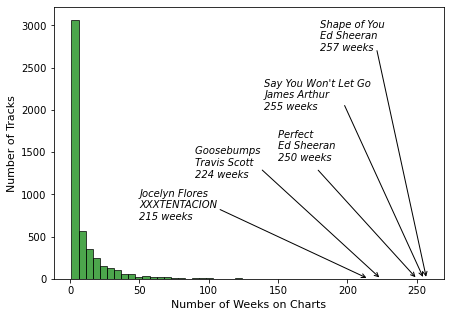

In [22]:
# plt.figure(figsize=(10,5))
# plt.title('Longevity of bestsellers',loc='center')
fig, ax = plt.subplots(figsize=(7,5))
# hist, bins, _ = plt.hist(data, 50, facecolor='g', alpha=0.75)
plt.hist(data, 50, facecolor='g',edgecolor="black", alpha=0.7)#,rwidth=0.85)
# top1
ax.annotate(text='', xy=(257, 1),  xycoords='data',
            xytext=(-50, 230), textcoords='offset points',#'axes fraction',
            arrowprops=dict(arrowstyle='->',facecolor='black'),#, shrink=0.05,width=0.3,headwidth=3),
            # horizontalalignment='right', verticalalignment='top',
            # textprops=dict()
            )
ax.text(180, 2700, 'Shape of You \nEd Sheeran \n257 weeks', style='italic',fontweight='medium')
        # bbox={'facecolor': 'g', 'alpha': 0.5, 'pad': 10})
# top2
ax.annotate(text='', xy=(255, 1),  xycoords='data',
            xytext=(-80, 175), textcoords='offset points',#'axes fraction',
            arrowprops=dict(arrowstyle='->',facecolor='black'),#, shrink=0.05,width=0.3,headwidth=3),
            )
ax.text(140, 2000, "Say You Won't Let Go \nJames Arthur \n255 weeks", style='italic',fontweight='medium')
        # bbox={'facecolor': 'g', 'alpha': 0.35, 'pad': 10})

# top3
ax.annotate(text='', xy=(250, 1),  xycoords='data',
            xytext=(-100, 110), textcoords='offset points',#'axes fraction',
            arrowprops=dict(arrowstyle='->',facecolor='black'),#, shrink=0.05,width=0.3,headwidth=3),
            )
ax.text(150, 1400, "Perfect \nEd Sheeran \n250 weeks", style='italic',fontweight='medium')
        # bbox={'facecolor': 'g', 'alpha': 0.2, 'pad': 10})

# top4
ax.annotate(text='', xy=(224, 1),  xycoords='data',
            xytext=(-120, 110), textcoords='offset points',#'axes fraction',
            arrowprops=dict(arrowstyle='->',facecolor='black'),#, shrink=0.05,width=0.3,headwidth=3),
            )
ax.text(90, 1200, "Goosebumps \nTravis Scott \n224 weeks", style='italic',fontweight='medium')

# top5
ax.annotate(text='', xy=(215, 1),  xycoords='data',
            xytext=(-150, 70), textcoords='offset points',#'axes fraction',
            arrowprops=dict(arrowstyle='->',facecolor='black'),#, shrink=0.05,width=0.3,headwidth=3),
            )
ax.text(50, 700, "Jocelyn Flores \nXXXTENTACION \n215 weeks", style='italic',fontweight='medium')
    
# ID
# 7m9OqQk4RVRkw9JJdeAw96    215
# 6gBFPUFcJLzWGx4lenP6h2    224
# 0tgVpDi06FyKpA1z0VMD4v    250
# 5uCax9HTNlzGybIStD3vDh    255
# 7qiZfU4dY1lWllzX7mPBI3    257
plt.xlabel('Number of Weeks on Charts',fontsize=11,fontweight='medium')
plt.ylabel('Number of Tracks',fontsize=11,fontweight='medium') 
# histogram on log scale. 
# Use non-equal bin sizes, such that they look equal on log scale.
# logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
# plt.title('Longevity of Success Tracks',loc='center')
plt.savefig('figures/figure0.png',dpi=300)

plt.show()

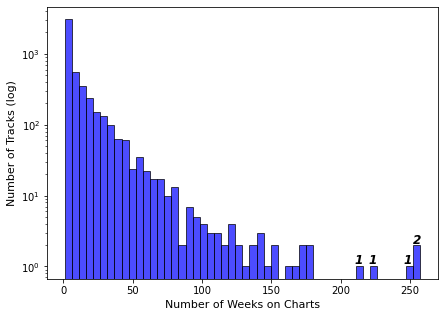

In [23]:
fig, ax = plt.subplots(figsize=(7,5))
plt.hist(data, bins=50,facecolor='b',edgecolor="black", alpha=0.7,log=True)#,histtype="step",cumulative=True)
# plt.hist(data, alpha=0.5,log=True,histtype="step",cumulative=True)
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Number of Weeks on Charts',fontsize=11,fontweight='medium')
plt.ylabel('Number of Tracks (log)',fontsize=11,fontweight='medium')
# plt.title('Longevity of Success Tracks (log)',loc='center')
# plt.tight_layout()
ax.text(210, 1.1, "1", style='italic',fontweight='bold',c='black',fontsize=12)
ax.text(220, 1.1, "1", style='italic',fontweight='bold',c='black',fontsize=12)
ax.text(245, 1.1, "1", style='italic',fontweight='bold',c='black',fontsize=12)
ax.text(252, 2.1, "2", style='italic',fontweight='bold',c='black',fontsize=12)
plt.savefig('figures/figure1.png',dpi=300)
plt.show()

In [24]:
number_of_week = list(df_1.groupby(by=['ID'])['Position'].count())
best_rank = list(df_1.groupby(by=['ID'])['Position'].min())

In [25]:
df_1.groupby(by=['ID'])['Position'].count()

ID
000xQL6tZNLJzIrtIgxqSl    17
003eoIwxETJujVWmNFMoZy     2
003vvx7Niy0yvhvHt4a68B    34
00B7TZ0Xawar6NZ00JFomN     2
00Blm7zeNqgYLPtW6zg8cj     8
                          ..
7zVCrzzEJU7u24sbJPXA5W     4
7zgqtptZvhf8GEmdsM2vp2     1
7zjEyeBsaw9gV0jofJLfOM     2
7zl7kehxesNEo2pYkKXTSe     1
7zxRMhXxJMQCeDDg0rKAVo     2
Name: Position, Length: 4918, dtype: int64

In [26]:
df_1.groupby(by=['ID'])['Position'].min()

ID
000xQL6tZNLJzIrtIgxqSl     46
003eoIwxETJujVWmNFMoZy    112
003vvx7Niy0yvhvHt4a68B    142
00B7TZ0Xawar6NZ00JFomN     75
00Blm7zeNqgYLPtW6zg8cj      9
                         ... 
7zVCrzzEJU7u24sbJPXA5W    146
7zgqtptZvhf8GEmdsM2vp2     13
7zjEyeBsaw9gV0jofJLfOM    191
7zl7kehxesNEo2pYkKXTSe    170
7zxRMhXxJMQCeDDg0rKAVo    171
Name: Position, Length: 4918, dtype: int64

In [27]:
# plt.figure(figsize=(7,5))
# plt.scatter(number_of_week,best_rank,c='red',alpha=0.7,linewidths=0.0000001)
# plt.ylim((201, 0))
# # plt.ylim((0, 201))
# plt.xscale('log')
# # plt.yscale('log')
# # plt.title('Best rank vs Number of weeks stayes')
# plt.xlabel('Number of weeks on Global Top 200')
# plt.ylabel('Best rank')
# plt.tight_layout()

# plt.savefig('figures/figure2.png')
# plt.show()

In [29]:
from collections import defaultdict

combination = list(zip(number_of_week,best_rank))

counter = defaultdict(int)

for c in combination:
    # x.append(c[0])
    # y.append(c[1])
    counter[c] += 1
    

x = [i[0] for i in counter.keys()]
y = [i[1] for i in counter.keys()]
s = list(counter.values())
size = [np.pi*i*i for i in s]
len(size),len(x),len(y)

(2382, 2382, 2382)

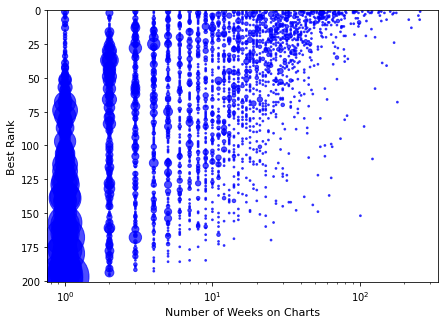

In [30]:
plt.figure(figsize=(7,5))
plt.scatter(x,y,s=size,c="blue",alpha=0.7)
plt.ylim((201, 0))
# plt.ylim((0, 201))
plt.xscale('log')

# plt.title('Best rank vs Number of weeks stayes')
plt.xlabel('Number of Weeks on Charts',fontsize=11,fontweight='medium')
plt.ylabel('Best Rank',fontsize=11,fontweight='medium')
# plt.tight_layout()

plt.savefig('figures/figure2.png',dpi=300)
plt.show()

In [31]:
# GO DEEPER OF THE TOP FIVE
# 7m9OqQk4RVRkw9JJdeAw96    215
# 6gBFPUFcJLzWGx4lenP6h2    224
# 0tgVpDi06FyKpA1z0VMD4v    250
# 5uCax9HTNlzGybIStD3vDh    255
# 7qiZfU4dY1lWllzX7mPBI3    257

In [32]:
df = pd.read_csv('top_200_weekly.csv')
df.head()

,Position,Track Name,Artist,Streams,URL,Week Start,Week End,ID,URI
0,1,Starboy,The Weeknd,25734078,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2016-12-30,2017-01-06,5aAx2yezTd8zXrkmtKl66Z,spotify:track:5aAx2yezTd8zXrkmtKl66Z
1,2,Closer,The Chainsmokers,23519705,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2016-12-30,2017-01-06,7BKLCZ1jbUBVqRi2FVlTVw,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw
2,3,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,21216399,https://open.spotify.com/track/5knuzwU65gJK7IF...,2016-12-30,2017-01-06,5knuzwU65gJK7IF5yJsuaW,spotify:track:5knuzwU65gJK7IF5yJsuaW
3,4,Let Me Love You,DJ Snake,19852704,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,2016-12-30,2017-01-06,4pdPtRcBmOSQDlJ3Fk945m,spotify:track:4pdPtRcBmOSQDlJ3Fk945m
4,5,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,18316326,https://open.spotify.com/track/3NdDpSvN911VPGi...,2016-12-30,2017-01-06,3NdDpSvN911VPGivFlV5d0,spotify:track:3NdDpSvN911VPGivFlV5d0


In [33]:
df_top5 = df[(df['ID']=='7qiZfU4dY1lWllzX7mPBI3') | 
   (df['ID']=='5uCax9HTNlzGybIStD3vDh') |
   (df['ID']=='0tgVpDi06FyKpA1z0VMD4v') |
   (df['ID']=='6gBFPUFcJLzWGx4lenP6h2') |
   (df['ID']=='7m9OqQk4RVRkw9JJdeAw96')
  ]
df_top5.head()

,Position,Track Name,Artist,Streams,URL,Week Start,Week End,ID,URI
7,8,Say You Won't Let Go,James Arthur,16950854,https://open.spotify.com/track/5uCax9HTNlzGybI...,2016-12-30,2017-01-06,5uCax9HTNlzGybIStD3vDh,spotify:track:5uCax9HTNlzGybIStD3vDh
191,192,goosebumps,Travis Scott,2619064,https://open.spotify.com/track/6gBFPUFcJLzWGx4...,2016-12-30,2017-01-06,6gBFPUFcJLzWGx4lenP6h2,spotify:track:6gBFPUFcJLzWGx4lenP6h2
200,1,Shape of You,Ed Sheeran,51095759,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-01-06,2017-01-13,7qiZfU4dY1lWllzX7mPBI3,spotify:track:7qiZfU4dY1lWllzX7mPBI3
206,7,Say You Won't Let Go,James Arthur,18269129,https://open.spotify.com/track/5uCax9HTNlzGybI...,2017-01-06,2017-01-13,5uCax9HTNlzGybIStD3vDh,spotify:track:5uCax9HTNlzGybIStD3vDh
385,186,goosebumps,Travis Scott,2778146,https://open.spotify.com/track/6gBFPUFcJLzWGx4...,2017-01-06,2017-01-13,6gBFPUFcJLzWGx4lenP6h2,spotify:track:6gBFPUFcJLzWGx4lenP6h2


In [34]:
df_top5.loc[:,'Year'] = pd.Series(map(lambda x:int(x[:4]) ,df['Week End']))
df_top5.loc[:,'Month'] = pd.Series(map(lambda x:int(x[5:7]) ,df['Week End']))

In [35]:
df_top5.info()
df_top5.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 7 to 52191
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Position    1201 non-null   int64 
 1   Track Name  1201 non-null   object
 2   Artist      1201 non-null   object
 3   Streams     1201 non-null   int64 
 4   URL         1201 non-null   object
 5   Week Start  1201 non-null   object
 6   Week End    1201 non-null   object
 7   ID          1201 non-null   object
 8   URI         1201 non-null   object
 9   Year        1201 non-null   int64 
 10  Month       1201 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 112.6+ KB


,Position,Track Name,Artist,Streams,URL,Week Start,Week End,ID,URI,Year,Month
7,8,Say You Won't Let Go,James Arthur,16950854,https://open.spotify.com/track/5uCax9HTNlzGybI...,2016-12-30,2017-01-06,5uCax9HTNlzGybIStD3vDh,spotify:track:5uCax9HTNlzGybIStD3vDh,2017,1
191,192,goosebumps,Travis Scott,2619064,https://open.spotify.com/track/6gBFPUFcJLzWGx4...,2016-12-30,2017-01-06,6gBFPUFcJLzWGx4lenP6h2,spotify:track:6gBFPUFcJLzWGx4lenP6h2,2017,1
200,1,Shape of You,Ed Sheeran,51095759,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-01-06,2017-01-13,7qiZfU4dY1lWllzX7mPBI3,spotify:track:7qiZfU4dY1lWllzX7mPBI3,2017,1
206,7,Say You Won't Let Go,James Arthur,18269129,https://open.spotify.com/track/5uCax9HTNlzGybI...,2017-01-06,2017-01-13,5uCax9HTNlzGybIStD3vDh,spotify:track:5uCax9HTNlzGybIStD3vDh,2017,1
385,186,goosebumps,Travis Scott,2778146,https://open.spotify.com/track/6gBFPUFcJLzWGx4...,2017-01-06,2017-01-13,6gBFPUFcJLzWGx4lenP6h2,spotify:track:6gBFPUFcJLzWGx4lenP6h2,2017,1


In [36]:
df_top5.to_csv('top5.csv', index=False)

In [37]:
df_top5 = pd.read_csv('top5.csv',parse_dates=['Week End'])
# df_top5.set_index('Week End', inplace=True)
df_top5.head()

,Position,Track Name,Artist,Streams,URL,Week Start,Week End,ID,URI,Year,Month
0,8,Say You Won't Let Go,James Arthur,16950854,https://open.spotify.com/track/5uCax9HTNlzGybI...,2016-12-30,2017-01-06,5uCax9HTNlzGybIStD3vDh,spotify:track:5uCax9HTNlzGybIStD3vDh,2017,1
1,192,goosebumps,Travis Scott,2619064,https://open.spotify.com/track/6gBFPUFcJLzWGx4...,2016-12-30,2017-01-06,6gBFPUFcJLzWGx4lenP6h2,spotify:track:6gBFPUFcJLzWGx4lenP6h2,2017,1
2,1,Shape of You,Ed Sheeran,51095759,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-01-06,2017-01-13,7qiZfU4dY1lWllzX7mPBI3,spotify:track:7qiZfU4dY1lWllzX7mPBI3,2017,1
3,7,Say You Won't Let Go,James Arthur,18269129,https://open.spotify.com/track/5uCax9HTNlzGybI...,2017-01-06,2017-01-13,5uCax9HTNlzGybIStD3vDh,spotify:track:5uCax9HTNlzGybIStD3vDh,2017,1
4,186,goosebumps,Travis Scott,2778146,https://open.spotify.com/track/6gBFPUFcJLzWGx4...,2017-01-06,2017-01-13,6gBFPUFcJLzWGx4lenP6h2,spotify:track:6gBFPUFcJLzWGx4lenP6h2,2017,1


In [38]:
ids = ['7m9OqQk4RVRkw9JJdeAw96',
'6gBFPUFcJLzWGx4lenP6h2',
'0tgVpDi06FyKpA1z0VMD4v',
'5uCax9HTNlzGybIStD3vDh',
'7qiZfU4dY1lWllzX7mPBI3']
print(f"isd:{ids}")

isd:['7m9OqQk4RVRkw9JJdeAw96', '6gBFPUFcJLzWGx4lenP6h2', '0tgVpDi06FyKpA1z0VMD4v', '5uCax9HTNlzGybIStD3vDh', '7qiZfU4dY1lWllzX7mPBI3']


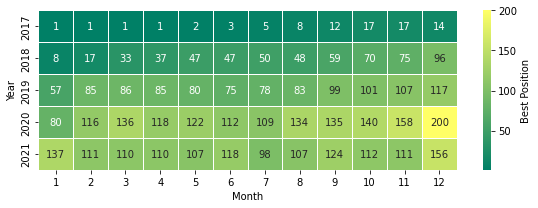

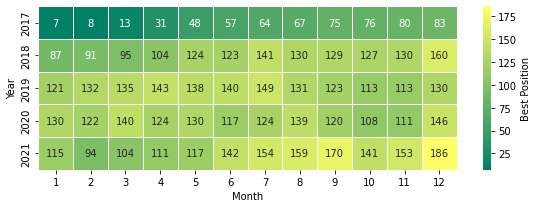

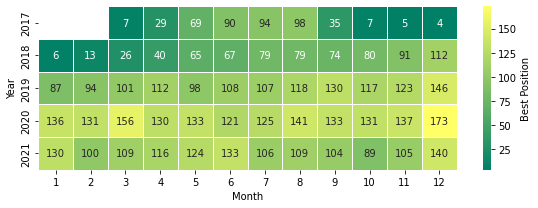

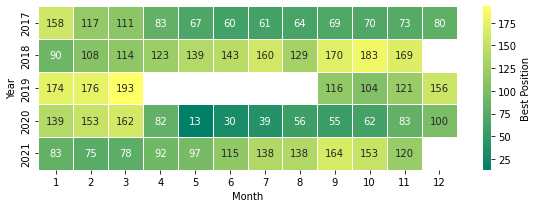

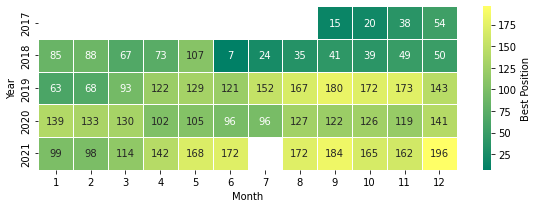

In [39]:
for i,t in enumerate(ids[::-1]):
    _1 = df_top5[df_top5['ID'] == t]
    df_1 = _1.groupby(by=['Year','Month']).min().reset_index()
    position_1 = df_1.pivot( "Year","Month", "Position").fillna(0).astype('int64')
    # heatmap
    fig, ax = plt.subplots(figsize=(8,3))
    mask = position_1==0
    sns.heatmap(position_1, cmap="summer",annot=True, annot_kws={"size": 10},fmt='d',
                linewidths=0.5, linecolor='white',ax=ax,mask=mask,cbar_kws={'label':'Best Position'})
    plt.tight_layout()
    path = f"figures/top5_{i+1}.png"
    plt.savefig(path,dpi=300)
    plt.show()
    # break

In [40]:
_1

,Position,Track Name,Artist,Streams,URL,Week Start,Week End,ID,URI,Year,Month
127,25,Jocelyn Flores,XXXTENTACION,13967227,https://open.spotify.com/track/7m9OqQk4RVRkw9J...,2017-08-25,2017-09-01,7m9OqQk4RVRkw9JJdeAw96,spotify:track:7m9OqQk4RVRkw9JJdeAw96,2017,9
132,26,Jocelyn Flores,XXXTENTACION,14256608,https://open.spotify.com/track/7m9OqQk4RVRkw9J...,2017-09-01,2017-09-08,7m9OqQk4RVRkw9JJdeAw96,spotify:track:7m9OqQk4RVRkw9JJdeAw96,2017,9
136,15,Jocelyn Flores,XXXTENTACION,16531894,https://open.spotify.com/track/7m9OqQk4RVRkw9J...,2017-09-08,2017-09-15,7m9OqQk4RVRkw9JJdeAw96,spotify:track:7m9OqQk4RVRkw9JJdeAw96,2017,9
142,16,Jocelyn Flores,XXXTENTACION,15940711,https://open.spotify.com/track/7m9OqQk4RVRkw9J...,2017-09-15,2017-09-22,7m9OqQk4RVRkw9JJdeAw96,spotify:track:7m9OqQk4RVRkw9JJdeAw96,2017,9
147,17,Jocelyn Flores,XXXTENTACION,15476929,https://open.spotify.com/track/7m9OqQk4RVRkw9J...,2017-09-22,2017-09-29,7m9OqQk4RVRkw9JJdeAw96,spotify:track:7m9OqQk4RVRkw9JJdeAw96,2017,9
...,...,...,...,...,...,...,...,...,...,...,...
1176,162,Jocelyn Flores,XXXTENTACION,5618241,https://open.spotify.com/track/7m9OqQk4RVRkw9J...,2021-11-05,2021-11-12,7m9OqQk4RVRkw9JJdeAw96,spotify:track:7m9OqQk4RVRkw9JJdeAw96,2021,11
1181,194,Jocelyn Flores,XXXTENTACION,5634231,https://open.spotify.com/track/7m9OqQk4RVRkw9J...,2021-11-12,2021-11-19,7m9OqQk4RVRkw9JJdeAw96,spotify:track:7m9OqQk4RVRkw9JJdeAw96,2021,11
1185,193,Jocelyn Flores,XXXTENTACION,5543017,https://open.spotify.com/track/7m9OqQk4RVRkw9J...,2021-11-19,2021-11-26,7m9OqQk4RVRkw9JJdeAw96,spotify:track:7m9OqQk4RVRkw9JJdeAw96,2021,11
1190,197,Jocelyn Flores,XXXTENTACION,5501607,https://open.spotify.com/track/7m9OqQk4RVRkw9J...,2021-11-26,2021-12-03,7m9OqQk4RVRkw9JJdeAw96,spotify:track:7m9OqQk4RVRkw9JJdeAw96,2021,12


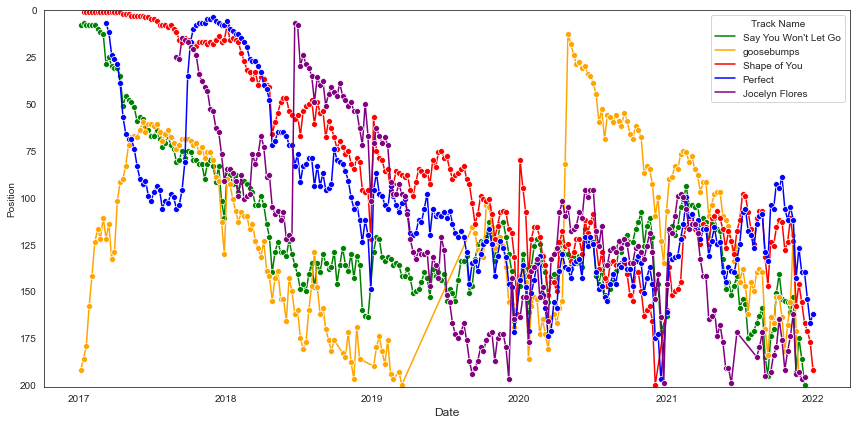

In [41]:
sns.set_style("white")
plt.figure(figsize=(12,6))
plt.ylim((201, 0))
palette = ["green","orange","red","blue","purple"]
sns.lineplot(x='Week End',y='Position',data=df_top5,hue='Track Name',palette=palette,marker='o')
plt.xlabel('Date',size=12)
plt.tight_layout()
plt.savefig("figures/top5.png",dpi=300)
plt.show()

### Q6. What are the relations between position, length of stay of a song on the list and song streams? 

In [42]:
df = pd.read_csv('top_200_weekly.csv')
df.head()

,Position,Track Name,Artist,Streams,URL,Week Start,Week End,ID,URI
0,1,Starboy,The Weeknd,25734078,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2016-12-30,2017-01-06,5aAx2yezTd8zXrkmtKl66Z,spotify:track:5aAx2yezTd8zXrkmtKl66Z
1,2,Closer,The Chainsmokers,23519705,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2016-12-30,2017-01-06,7BKLCZ1jbUBVqRi2FVlTVw,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw
2,3,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,21216399,https://open.spotify.com/track/5knuzwU65gJK7IF...,2016-12-30,2017-01-06,5knuzwU65gJK7IF5yJsuaW,spotify:track:5knuzwU65gJK7IF5yJsuaW
3,4,Let Me Love You,DJ Snake,19852704,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,2016-12-30,2017-01-06,4pdPtRcBmOSQDlJ3Fk945m,spotify:track:4pdPtRcBmOSQDlJ3Fk945m
4,5,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,18316326,https://open.spotify.com/track/3NdDpSvN911VPGi...,2016-12-30,2017-01-06,3NdDpSvN911VPGivFlV5d0,spotify:track:3NdDpSvN911VPGivFlV5d0


In [43]:
data_streams = df.groupby(by='ID').max()['Streams']

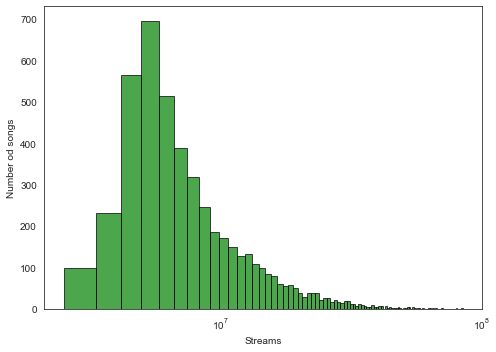

In [44]:
fig, ax = plt.subplots(figsize=(7,5))
# plt.hist(data_streams,bins=100,facecolor='g', alpha=0.7)
plt.hist(data_streams, 100, facecolor='green',edgecolor="black", alpha=0.7)#,rwidth=0.85)
plt.xscale('log')
# plt.yscale('log')
# plt.title('Number of songs vs Streams')
plt.xlabel('Streams')
plt.ylabel('Number od songs')
plt.tight_layout()

plt.savefig('figures/figure3.png',dpi=300)
plt.show()
plt.show()

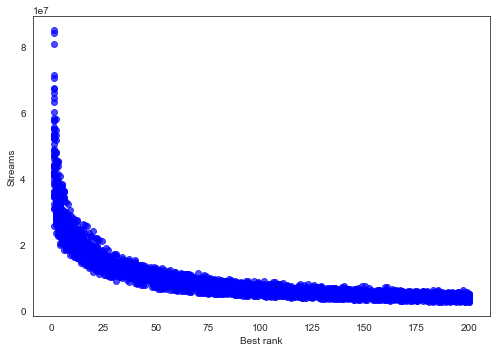

In [45]:
fig, ax = plt.subplots(figsize=(7,5))
plt.scatter(best_rank,data_streams,facecolor='blue', alpha=0.7)#,c='DarkBlue')
# plt.ylim((201, 0))
# plt.xscale('log')
# plt.yscale('log')
# plt.title('Best rank vs Number of weeks stayes')
plt.xlabel('Best rank')
plt.ylabel('Streams')
plt.tight_layout()

plt.savefig('figures/figure4.png',dpi=300)
plt.show()

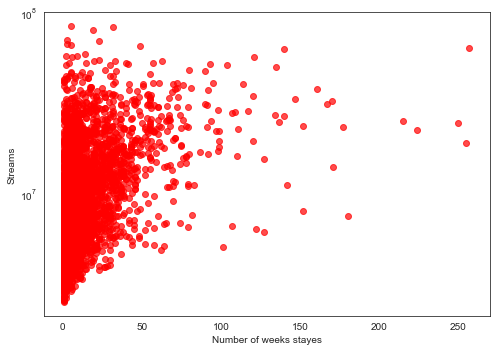

In [46]:
fig, ax = plt.subplots(figsize=(7,5))
plt.scatter(number_of_week,data_streams,facecolor='red', alpha=0.7)#,c='DarkBlue')
# sns.scatterplot(number_of_week,data_streams,data=df_1)
# plt.ylim((201, 0))
# plt.xscale('log')
plt.yscale('log')
# plt.title('Best rank vs Number of weeks stayes')
plt.xlabel('Number of weeks stayes')
plt.ylabel('Streams')
plt.tight_layout()

plt.savefig('figures/figure5.png',dpi=300)
plt.show()

In [47]:
# from random import randint
# %matplotlib tk
# import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation
# from IPython.display import HTML
# # create empty lists for the x and y data
# x = []
# y = []

# # create the figure and axes objects
# fig, ax = plt.subplots()

# # function that draws each frame of the animation
# def animate(i):
#     pt = randint(1,9) # grab a random integer to be the next y-value in the animation
#     x.append(i)
#     y.append(pt)

#     ax.clear()
#     ax.plot(x, y)
#     ax.set_xlim([0,20])
#     ax.set_ylim([0,10])
    
    
# # run the animation
# ani = FuncAnimation(fig, animate, frames=20, interval=500, repeat=False)
# # HTML(ani.to_html5_video())
# ani.save("sin1.gif",writer='pillow')
# plt.show()